<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/Week%202/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Meminta otorisasi untuk mengakses Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/EconomiesOfScale.csv'

# Membaca dataset CSV menggunakan pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [ ]:
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [ ]:
df.head(10)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

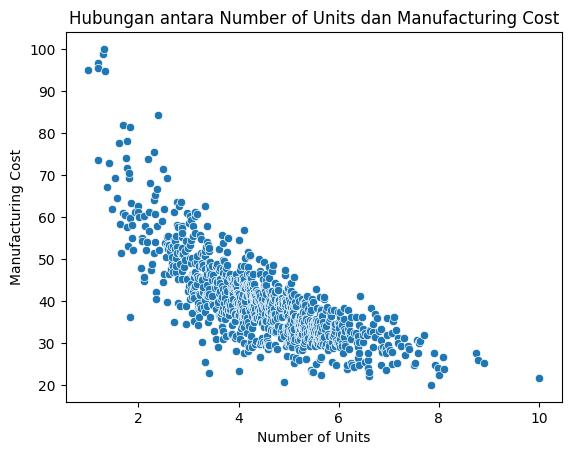

In [ ]:
#Membuat Scatter plot
sns.scatterplot(data=df, x='Number of Units', y="Manufacturing Cost")

#Memberikan Judul label sumbu
plt.title("Hubungan antara Number of Units dan Manufacturing Cost")
plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")

plt.show()


In [6]:
x = df["Number of Units"]

y = df["Manufacturing Cost"]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


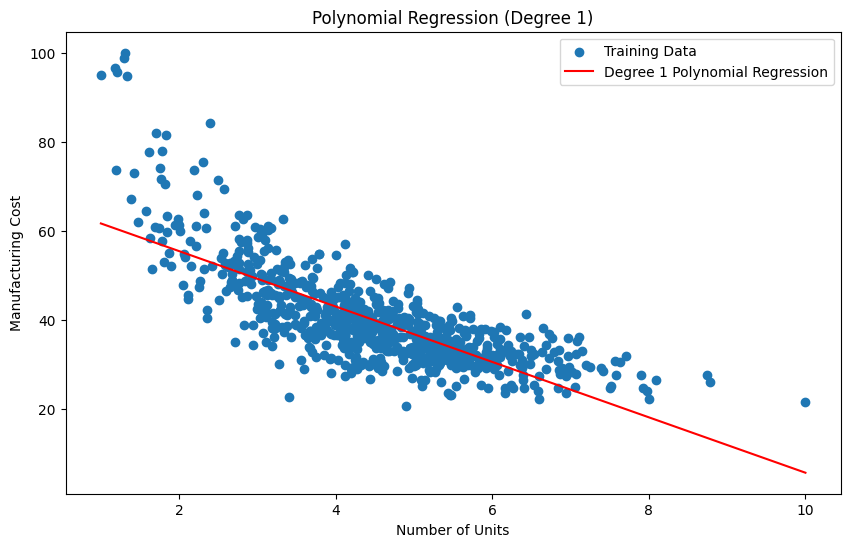

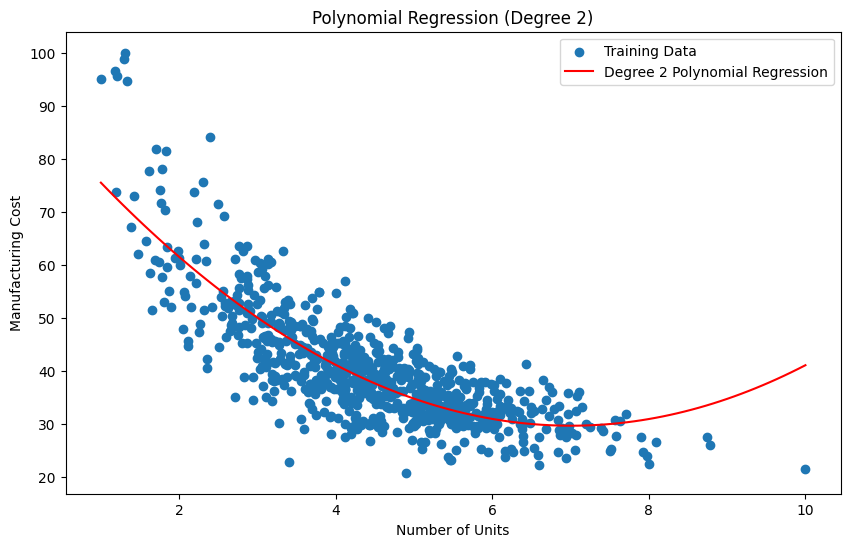

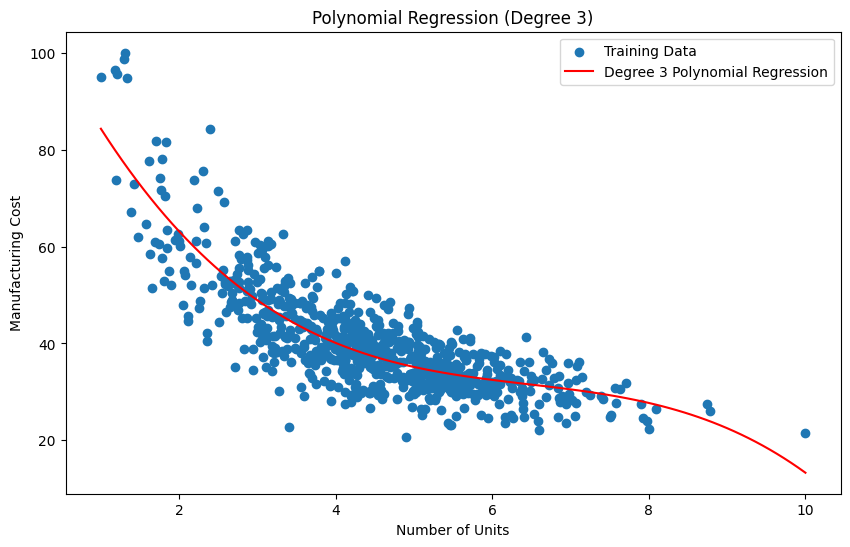

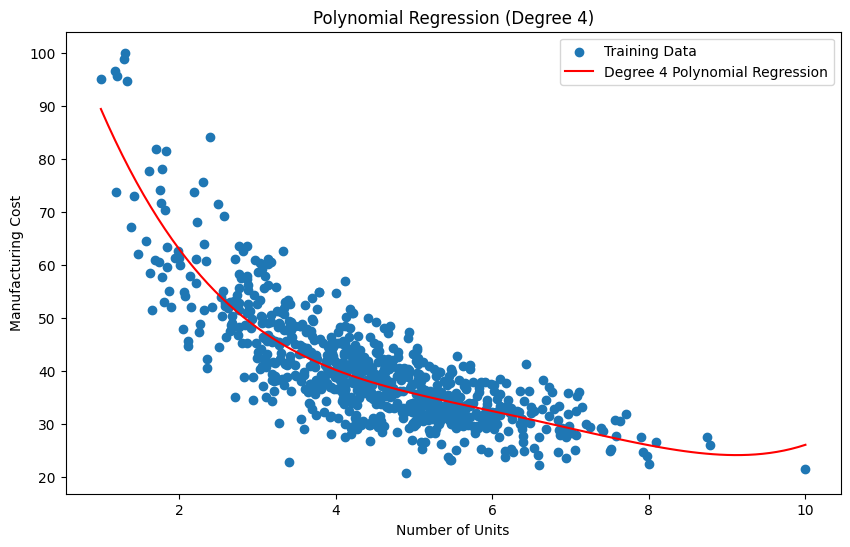

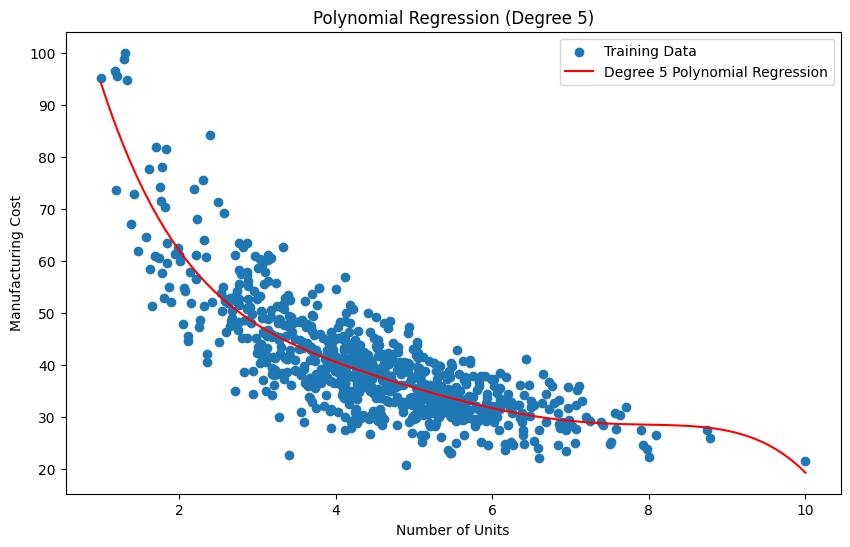

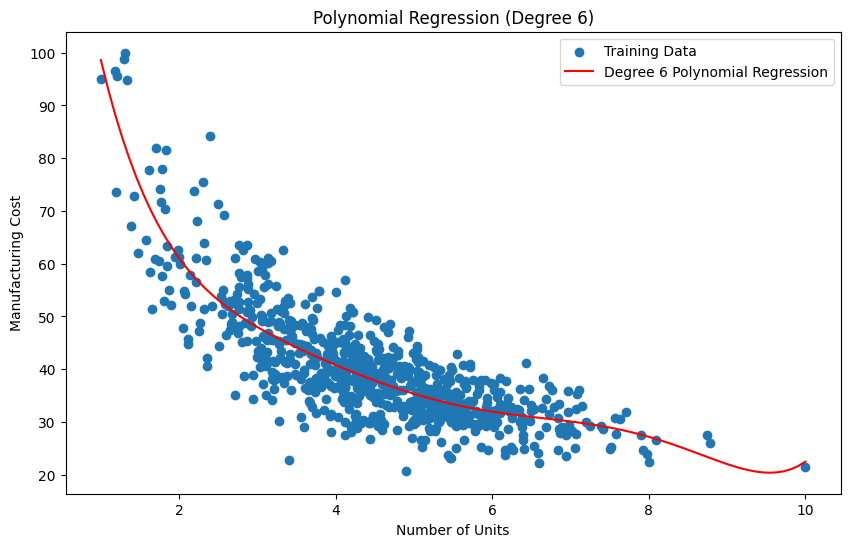

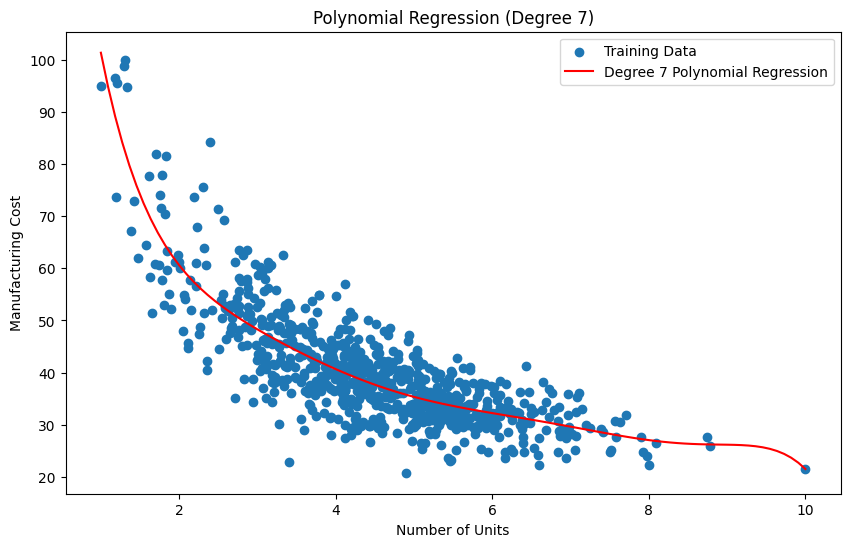

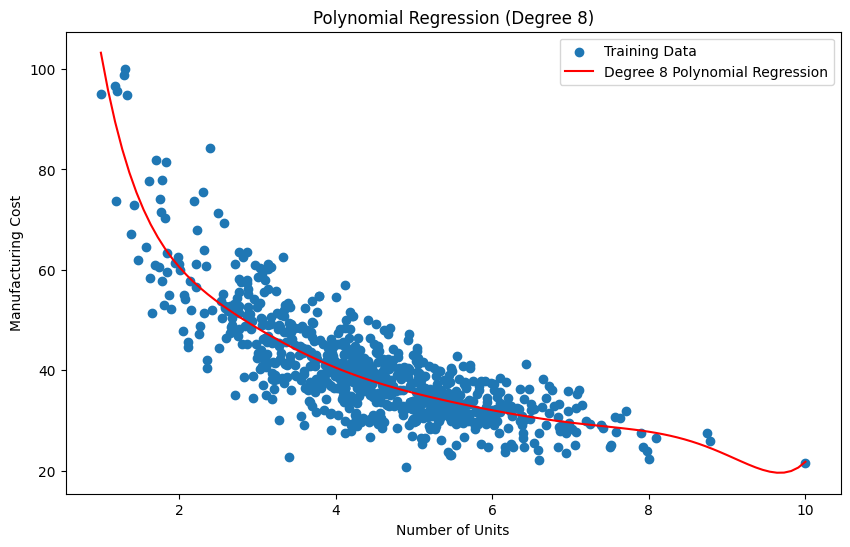

Degree 1 MSE: 50.299188047192914
Degree 2 MSE: 38.75355289252079
Degree 3 MSE: 35.832562251215755
Degree 4 MSE: 35.171552986114065
Degree 5 MSE: 34.76984554742409
Degree 6 MSE: 34.520634995497154
Degree 7 MSE: 34.431826439116584
Degree 8 MSE: 34.39496442580491


In [ ]:
# Misalkan Anda sudah memiliki DataFrame df
# Pastikan untuk menyesuaikan nama kolom dengan data yang sesuai
# Di sini, kami mengasumsikan "Number of Units" sebagai variabel independen (x) dan "Manufacturing Cost" sebagai variabel dependen (y)
x = df['Number of Units'].values.reshape(-1, 1)
y = df['Manufacturing Cost'].values

# Membagi data menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi array untuk menyimpan hasil MSE pada setiap derajat polinomial
mse_values = []

# Degree 1 hingga 8
degrees = list(range(1, 9))

# Loop melalui derajat polinomial
for degree in degrees:
    # Transformasi fitur menjadi polinomial
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # Inisialisasi dan melatih model regresi linear
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Menghitung prediksi pada data pelatihan
    y_train_pred = model.predict(x_train_poly)

    # Menghitung Mean Squared Error pada data pelatihan
    mse = mean_squared_error(y_train, y_train_pred)
    mse_values.append(mse)

    # Menampilkan plot hasil regresi
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label='Training Data')
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    plt.plot(x_range, y_range_pred, color='red', label=f'Degree {degree} Polynomial Regression')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()
    plt.show()

# Menampilkan MSE pada setiap derajat polinomial
for degree, mse_value in zip(degrees, mse_values):
    print(f'Degree {degree} MSE: {mse_value}')